In [34]:
import numpy as np
from sklearn import linear_model

def ajuste_lineal(X_train, Y_train, X_test):
    
    """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

    N=len(X_train)
    N_test=len(X_test)
    #Start
    reg = linear_model.LinearRegression() #Creo objeto de LinearRegression
    reg.fit(X_train, Y_train) # Uso el metodo fit para entrenar el modelo
    m_sk = reg.coef_ # Ordenada del ajuste
    b_sk = reg.intercept_ # Pendiente del ajuste
    Y_test = reg.predict(X_test) #Guardo prediccion del ajuste para x_test
    
    
    #Finish
    assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
    return np.array(Y_test)

## Explicacion un poco mas detallada del ejercicio
Ver notebook de Modelos lineales en Escritorio/Joaquin/Cursadas/Aprendizaje Automatico2020/Mi repositorio GitHub/UNSAM_IA/05_ModelosLineales.ipynb

Ground truth
b = 2
m = 5

Ajuste manual
w_0 = 1.809981
w_1 = 5.246565

Ajuste usando sklearn
w_0 = 1.809981
w_1 = 5.246565
ambos metodos coinciden? True


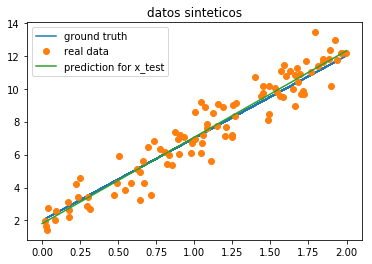

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## creo datos sinteticos para probar 
m = 5
b = 2

n = 100 # cantidad de datos
x_train = 2 * np.random.rand(n, 1)
ground_truth = b + m*x_train
real_data = ground_truth + np.random.randn(n,1) #agrego ruido gaussiano
t = real_data

## Ploteo los datos sinteticos
plt.plot(x_train, ground_truth, label='ground truth')
ax = plt.gca()
ax.plot(x_train, real_data, 'o', label ='real data')
ax.set_title("datos sinteticos")


#######################################################
### Metodo 1 - Calculo los parametros W_ml "a mano" ###

# Defino la matriz de diseño
phi = np.hstack([x_train*0.0 + 1, x_train])

pp = np.dot(phi.T, phi)
# (2 x 80) . (80 x 2) ==> (2 x 2)

yy = np.dot(phi.T, t)
# (2 x 80) . (80 x 1) --> (2 x 1)

## Utilizo ecuaciones normales para obtener los parametros de ML:

wml = np.linalg.solve(pp, yy)

###########################################################################
### Metodo 2 - Obtengo los parametros w_ml usando sklearn.linear_models ###

reg = linear_model.LinearRegression() #Create a linear regression object
reg.fit(x_train, t) # Using the fit method. Using the real data to train the model (to make the fit)
m_sk = reg.coef_
b_sk = reg.intercept_


x_test = np.linspace(0, 2, 100)
#print(x_test)
x_test = x_test.reshape(len(x_test), 1)
#print(x_test)

##### Pruebo la funcion ######
y_test = ajuste_lineal(x_train, real_data, x_test)

#print(y_test.shape)
ax.plot(x_test, y_test, label='prediction for x_test')
plt.legend()

#print(wml)
print("Ground truth")
print('b = {}'.format(b))
print('m = {}'.format(m))

print("\nAjuste manual")
print("w_0 = %f" % wml[0])
print("w_1 = %f" % wml[1])

print("\nAjuste usando sklearn")
print("w_0 = %f" % b_sk)
print("w_1 = %f" % m_sk)

print("ambos metodos coinciden? %s" % np.allclose([b_sk, m_sk], wml))
